In [1]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import sklearn
from sklearn.linear_model import LogisticRegression
import xgboost
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
%matplotlib inline

## Reading the data and droping the index column

In [75]:
df = pd.read_csv("UCI_Credit_Card.csv",index_col = 0)
pd.options.display.max_columns = None
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [76]:
# Looking for any missing info or null values in the data

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   SEX                         30000 non-null  int64  
 2   EDUCATION                   30000 non-null  int64  
 3   MARRIAGE                    30000 non-null  int64  
 4   AGE                         30000 non-null  int64  
 5   PAY_0                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   30000 non-null  float64
 12  BILL_AMT2                   30000 non-null  float64
 13  BILL_AMT3                   300

In [77]:
# Looking for the values and if there are any negative values in the dataset
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [78]:
# Finding the skewness in the columns to see data in any of the columns need any treatment
# For skewness, if the value is greater than + 1.0, the distribution is right skewed. 
# If the value is less than -1.0, the distribution is left skewed.
df.skew()

LIMIT_BAL                      0.992867
SEX                           -0.424183
EDUCATION                      0.970972
MARRIAGE                      -0.018742
AGE                            0.732246
PAY_0                          0.731975
PAY_2                          0.790565
PAY_3                          0.840682
PAY_4                          0.999629
PAY_5                          1.008197
PAY_6                          0.948029
BILL_AMT1                      2.663861
BILL_AMT2                      2.705221
BILL_AMT3                      3.087830
BILL_AMT4                      2.821965
BILL_AMT5                      2.876380
BILL_AMT6                      2.846645
PAY_AMT1                      14.668364
PAY_AMT2                      30.453817
PAY_AMT3                      17.216635
PAY_AMT4                      12.904985
PAY_AMT5                      11.127417
PAY_AMT6                      10.640727
default.payment.next.month     1.343504
dtype: float64

### One hot encoding of education 
Marriage ,Education and Sex columns in our dataset are nominal features, we have to transform these in to 0s and 1s so that each unique value has its own column so that model does not condider them as an ordinal features and have a better accuracy

In [79]:
#Nominal features
categorical_cols = ['SEX', 'EDUCATION', 'MARRIAGE'] 

df1 = pd.get_dummies(df, columns = categorical_cols, drop_first = True)
df1

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,20000.0,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,1,0,1,0,0,0,0,1,0,0
2,120000.0,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,1,0,1,0,0,0,0,0,1,0
3,90000.0,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,1,0,1,0,0,0,0,0,1,0
4,50000.0,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,1,0,1,0,0,0,0,1,0,0
5,50000.0,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000.0,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0,0,0,0,1,0,0,0,1,0,0
29997,150000.0,43,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0,0,0,0,1,0,0,0,0,1,0
29998,30000.0,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1,0,0,1,0,0,0,0,0,1,0


In [74]:
# df1.drop(['SEX', 'EDUCATION', 'MARRIAGE'], axis=1, inplace=True)
df1.columns.value_counts()

BILL_AMT1                     1
PAY_AMT3                      1
BILL_AMT3                     1
MARRIAGE_3                    1
PAY_AMT5                      1
EDUCATION_1                   1
EDUCATION_3                   1
PAY_AMT6                      1
MARRIAGE_2                    1
BILL_AMT4                     1
PAY_AMT2                      1
PAY_3                         1
AGE                           1
EDUCATION_4                   1
PAY_5                         1
SEX_2                         1
EDUCATION_5                   1
BILL_AMT2                     1
PAY_4                         1
EDUCATION_2                   1
EDUCATION_6                   1
BILL_AMT6                     1
LIMIT_BAL                     1
PAY_AMT1                      1
MARRIAGE_1                    1
PAY_AMT4                      1
BILL_AMT5                     1
PAY_6                         1
PAY_0                         1
default.payment.next.month    1
PAY_2                         1
dtype: i

## Preprocessing - Create dependent and independent features

In [8]:
# # Extracting dependent variable(All the columns except the "default.payment.next.month" column)
# X = df.iloc[:, :-1]

# # Extracting dependent variable("default.payment.next.month" column)
# y = df.iloc[ :, -1:]

X = df1.drop('default.payment.next.month', axis=1).copy()
y = df1['default.payment.next.month'].copy()

In [9]:
X.shape

(30000, 30)

## Dependent feature

## Dealing with Imbalance dataset
Now we are going tobalance the dataset via using a combination of both over and under sampling method - SMOTETomek
this method combines the SMOTE ability to generate synthetic data for minority class and Tomek Links ability to remove the data that are identified as Tomek links from the majority class (that is, samples of data from the majority class that is closest with the minority class data)

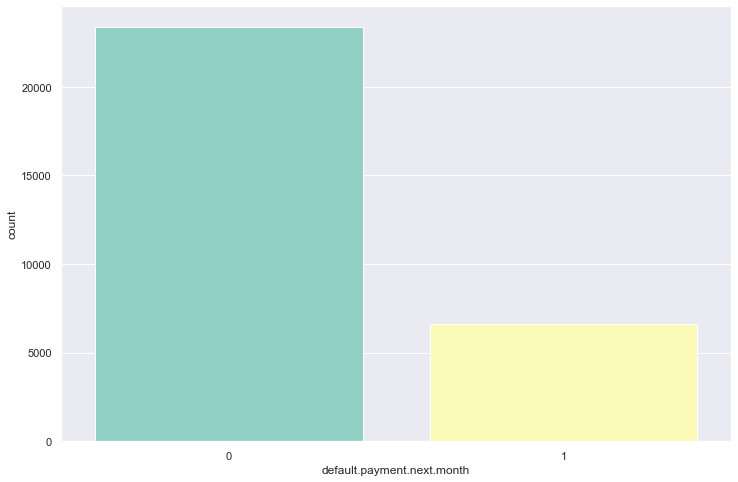

In [10]:
# Checking how many Default payments we have in dependent feature (1=yes, 0=no)
# Count plot for "default.payment.next.month"
sns.set(rc = {'figure.figsize':(12,8)})
ax = sns.countplot(x="default.payment.next.month",data=df1,saturation=.90,palette="Set3")
plt.show()

In [11]:
# As shown in the countplot we have an imbalance dataset where 23364 entries are normal transactions and 6636 
# entries are of default payments in the next month

df1['default.payment.next.month'].value_counts()

0    23364
1     6636
Name: default.payment.next.month, dtype: int64

In [12]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.combine import SMOTETomek 

In [13]:
smt = SMOTETomek(random_state=42)
X_res, y_res = smt.fit_resample(X, y) # res - resampled
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({1: 22743, 0: 22743})


In [14]:
X_res.shape, y_res.shape

((45486, 30), (45486,))

## Separate dataset into train and test(to avoid overfitting)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_res,
    y_res,
    test_size=0.3,
    random_state=42)

X_train.shape, X_test.shape  ##pd.DataFrame(y_train), pd.DataFrame(y_test)

((31840, 30), (13646, 30))

In [16]:

y_test.shape

(13646,)




## Independent Features
### Feature Selection

In [17]:
#Creating a dataframe to explore the independent features
X_train = pd.DataFrame(X_train)
X_train

correlation_matrix = X_train.corr()

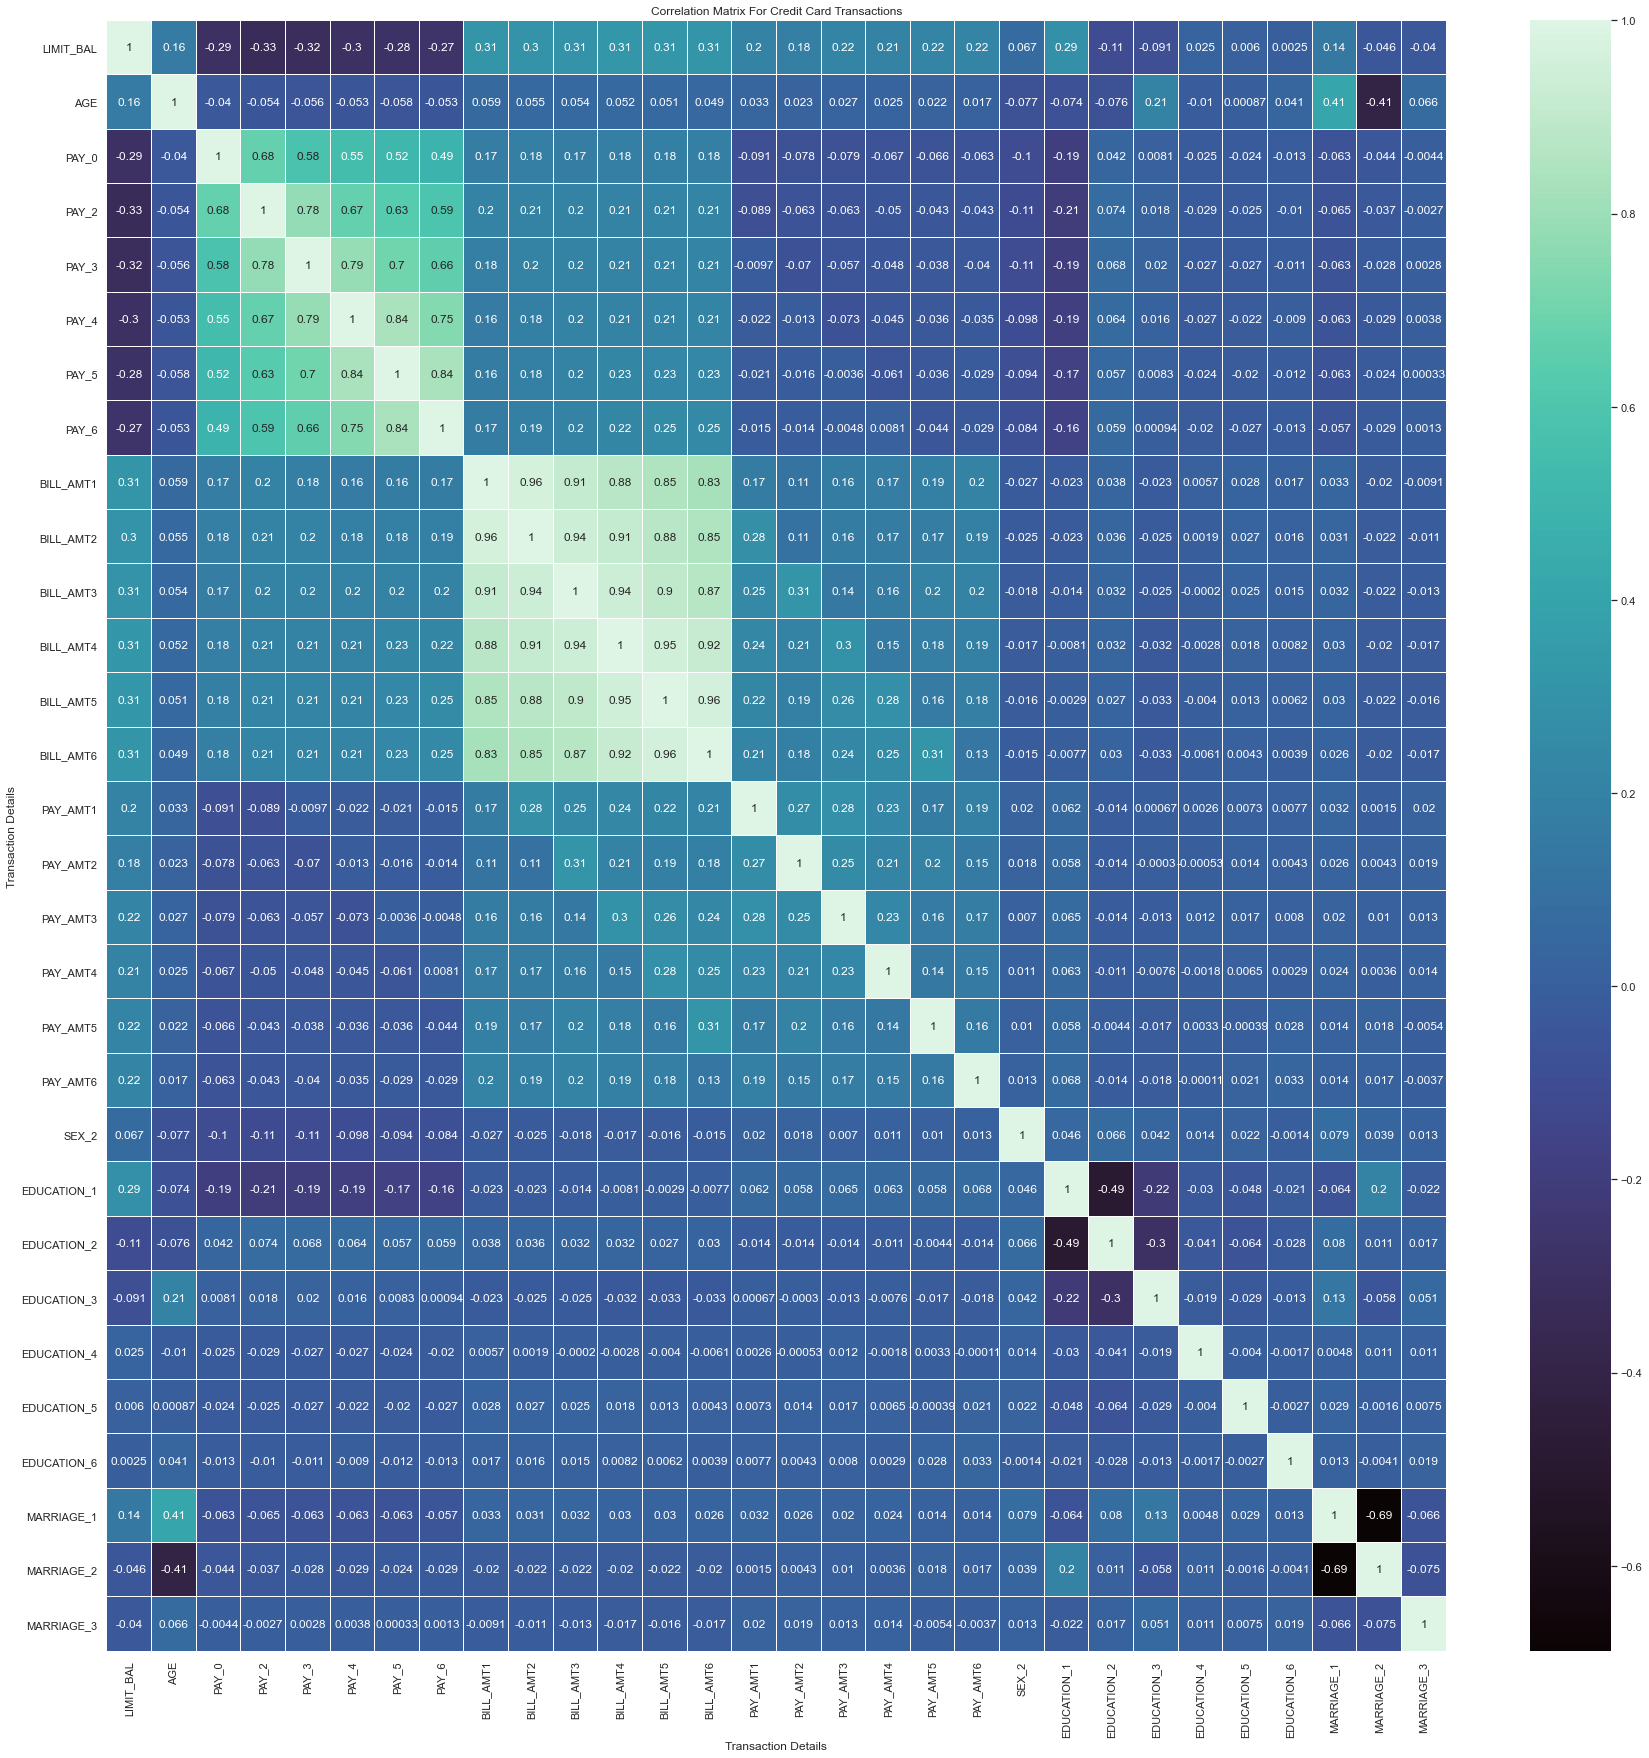

In [18]:
sns.set(rc = {'figure.figsize':(30,30)})
sns.heatmap(correlation_matrix,linewidths = .005,annot=True,cmap='mako')
# sns.heatmap(correlation,linewidths = .005,cmap='mako')
plt.title('Correlation Matrix For Credit Card Transactions')
plt.xlabel('Transaction Details')
plt.ylabel('Transaction Details')
plt.show()
                                                    


In [19]:
# Function to select and remove highly correlated features 

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

# Now will try to see how many features are 70% correlated

corr_features = correlation(X_train, 0.7)
len(set(corr_features))


9

In [20]:
corr_features

{'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6'}

In [21]:
# Now we are going to remove these features from our X_train and X_test dataset
X_train = X_train.drop(corr_features,axis=1)

In [22]:
X_train.columns

Index(['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'BILL_AMT1', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'SEX_2',
       'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4',
       'EDUCATION_5', 'EDUCATION_6', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3'],
      dtype='object')

In [23]:
X_test = pd.DataFrame(X_test).drop(corr_features,axis=1)
X_test

,LIMIT_BAL,AGE,PAY_0,PAY_2,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
37610,132215.212309,34,2,2,123188.046213,13736.664497,0.000000,6574.693416,4585.120861,4479.740553,4686.558730,0,0,0,0,0,0,0,0,0,0
19607,30000.000000,50,0,0,17891.000000,1800.000000,1600.000000,1600.000000,1000.000000,734.000000,481.000000,1,0,0,1,0,0,0,0,1,0
3640,180000.000000,27,1,-2,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,1,0,0,0,0,0,0,1,0
16468,50000.000000,22,0,0,46811.000000,1036.000000,50622.000000,1149.000000,15311.000000,19387.000000,385.000000,1,0,0,1,0,0,0,0,1,0
29758,30000.000000,23,1,2,14232.222489,502.648677,1017.580807,0.000000,0.000000,0.000000,455.076461,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3091,150000.000000,26,0,0,22683.000000,2219.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0,0,0,0,1,0,0,1,0
38397,50000.000000,47,1,1,44800.821754,3536.471787,0.000000,2529.721897,517.483275,1510.461139,472.973419,1,0,0,0,0,0,0,0,1,0
14791,200000.000000,30,-1,2,1626.000000,233.000000,3049.000000,700.000000,2423.000000,2210.000000,1233.000000,1,0,1,0,0,0,0,1,0,0
3941,150000.000000,30,0,0,63150.000000,6000.000000,0.000000,8023.000000,0.000000,5700.000000,0.000000,1,0,1,0,0,0,0,0,1,0


In [24]:
X_train.columns


Index(['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'BILL_AMT1', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'SEX_2',
       'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4',
       'EDUCATION_5', 'EDUCATION_6', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3'],
      dtype='object')

In [25]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

In [26]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [28]:
#function to calculate the time
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [29]:
classifier=xgboost.XGBClassifier(use_label_encoder = False,eval_metric='mlogloss')

In [30]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [31]:
from datetime import datetime
# time calculation
# start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train,y_train)
# timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False,
                                           eval_metric='mlogloss', gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=n...
                                           scale_pos_weight=None,
                                           subsample=None, tree_method=None,
                                      

In [32]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, eval_metric='mlogloss', gamma=0.1,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=12,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [33]:
random_search.best_params_

{'min_child_weight': 1,
 'max_depth': 12,
 'learning_rate': 0.15,
 'gamma': 0.1,
 'colsample_bytree': 0.5}

In [34]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7,
              enable_categorical=False, eval_metric='mlogloss', gamma=0.1,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=12,
              min_child_weight=3, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [35]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X_train,y_train,cv=10)

In [36]:
score

array([0.85646985, 0.86589196, 0.85364322, 0.85678392, 0.8548995 ,
       0.85961055, 0.85332915, 0.85301508, 0.85835427, 0.85961055])

In [37]:
score.mean()

0.8571608040201004

In [38]:
import xgboost

# classifier=xgboost.XGBRegressor()
classifier = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7,
              enable_categorical=False, eval_metric='mlogloss', gamma=0.1,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=12,
              min_child_weight=3, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [39]:
import xgboost
# regressor=xgboost.XGBRegressor()

In [40]:
# regressor.fit(X_train,y_train) # as the accuracy is (.55) with regressor, will use classifier instead

In [41]:
classifier.fit(X_train,y_train) # as the accuracy score(0.8606) is better with classifier will fit the data in classifier

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7,
              enable_categorical=False, eval_metric='mlogloss', gamma=0.1,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=12,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [42]:
X_test

,LIMIT_BAL,AGE,PAY_0,PAY_2,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
37610,132215.212309,34,2,2,123188.046213,13736.664497,0.000000,6574.693416,4585.120861,4479.740553,4686.558730,0,0,0,0,0,0,0,0,0,0
19607,30000.000000,50,0,0,17891.000000,1800.000000,1600.000000,1600.000000,1000.000000,734.000000,481.000000,1,0,0,1,0,0,0,0,1,0
3640,180000.000000,27,1,-2,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,1,0,0,0,0,0,0,1,0
16468,50000.000000,22,0,0,46811.000000,1036.000000,50622.000000,1149.000000,15311.000000,19387.000000,385.000000,1,0,0,1,0,0,0,0,1,0
29758,30000.000000,23,1,2,14232.222489,502.648677,1017.580807,0.000000,0.000000,0.000000,455.076461,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3091,150000.000000,26,0,0,22683.000000,2219.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0,0,0,0,1,0,0,1,0
38397,50000.000000,47,1,1,44800.821754,3536.471787,0.000000,2529.721897,517.483275,1510.461139,472.973419,1,0,0,0,0,0,0,0,1,0
14791,200000.000000,30,-1,2,1626.000000,233.000000,3049.000000,700.000000,2423.000000,2210.000000,1233.000000,1,0,1,0,0,0,0,1,0,0
3941,150000.000000,30,0,0,63150.000000,6000.000000,0.000000,8023.000000,0.000000,5700.000000,0.000000,1,0,1,0,0,0,0,0,1,0


In [43]:
X_test.columns


Index(['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'BILL_AMT1', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'SEX_2',
       'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4',
       'EDUCATION_5', 'EDUCATION_6', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3'],
      dtype='object')

In [44]:
y_prediction=classifier.predict(X_test)
y_prediction

array([1, 0, 1, ..., 1, 0, 1])

In [45]:
### Check Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_prediction)

In [46]:
score

0.8607650593580537

/Users/priyanka/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='default.payment.next.month', ylabel='Density'>

[CV 4/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=5, min_child_weight=1; total time=   4.6s
[CV 5/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=5, min_child_weight=1; total time=   5.6s
[CV 2/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.15, max_depth=12, min_child_weight=1; total time=  16.5s
[CV 1/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.25, max_depth=3, min_child_weight=3; total time=   3.6s
[CV 4/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.25, max_depth=3, min_child_weight=3; total time=   3.2s
[CV 2/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=3; total time=   4.6s
[CV 5/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=3; total time=   2.8s


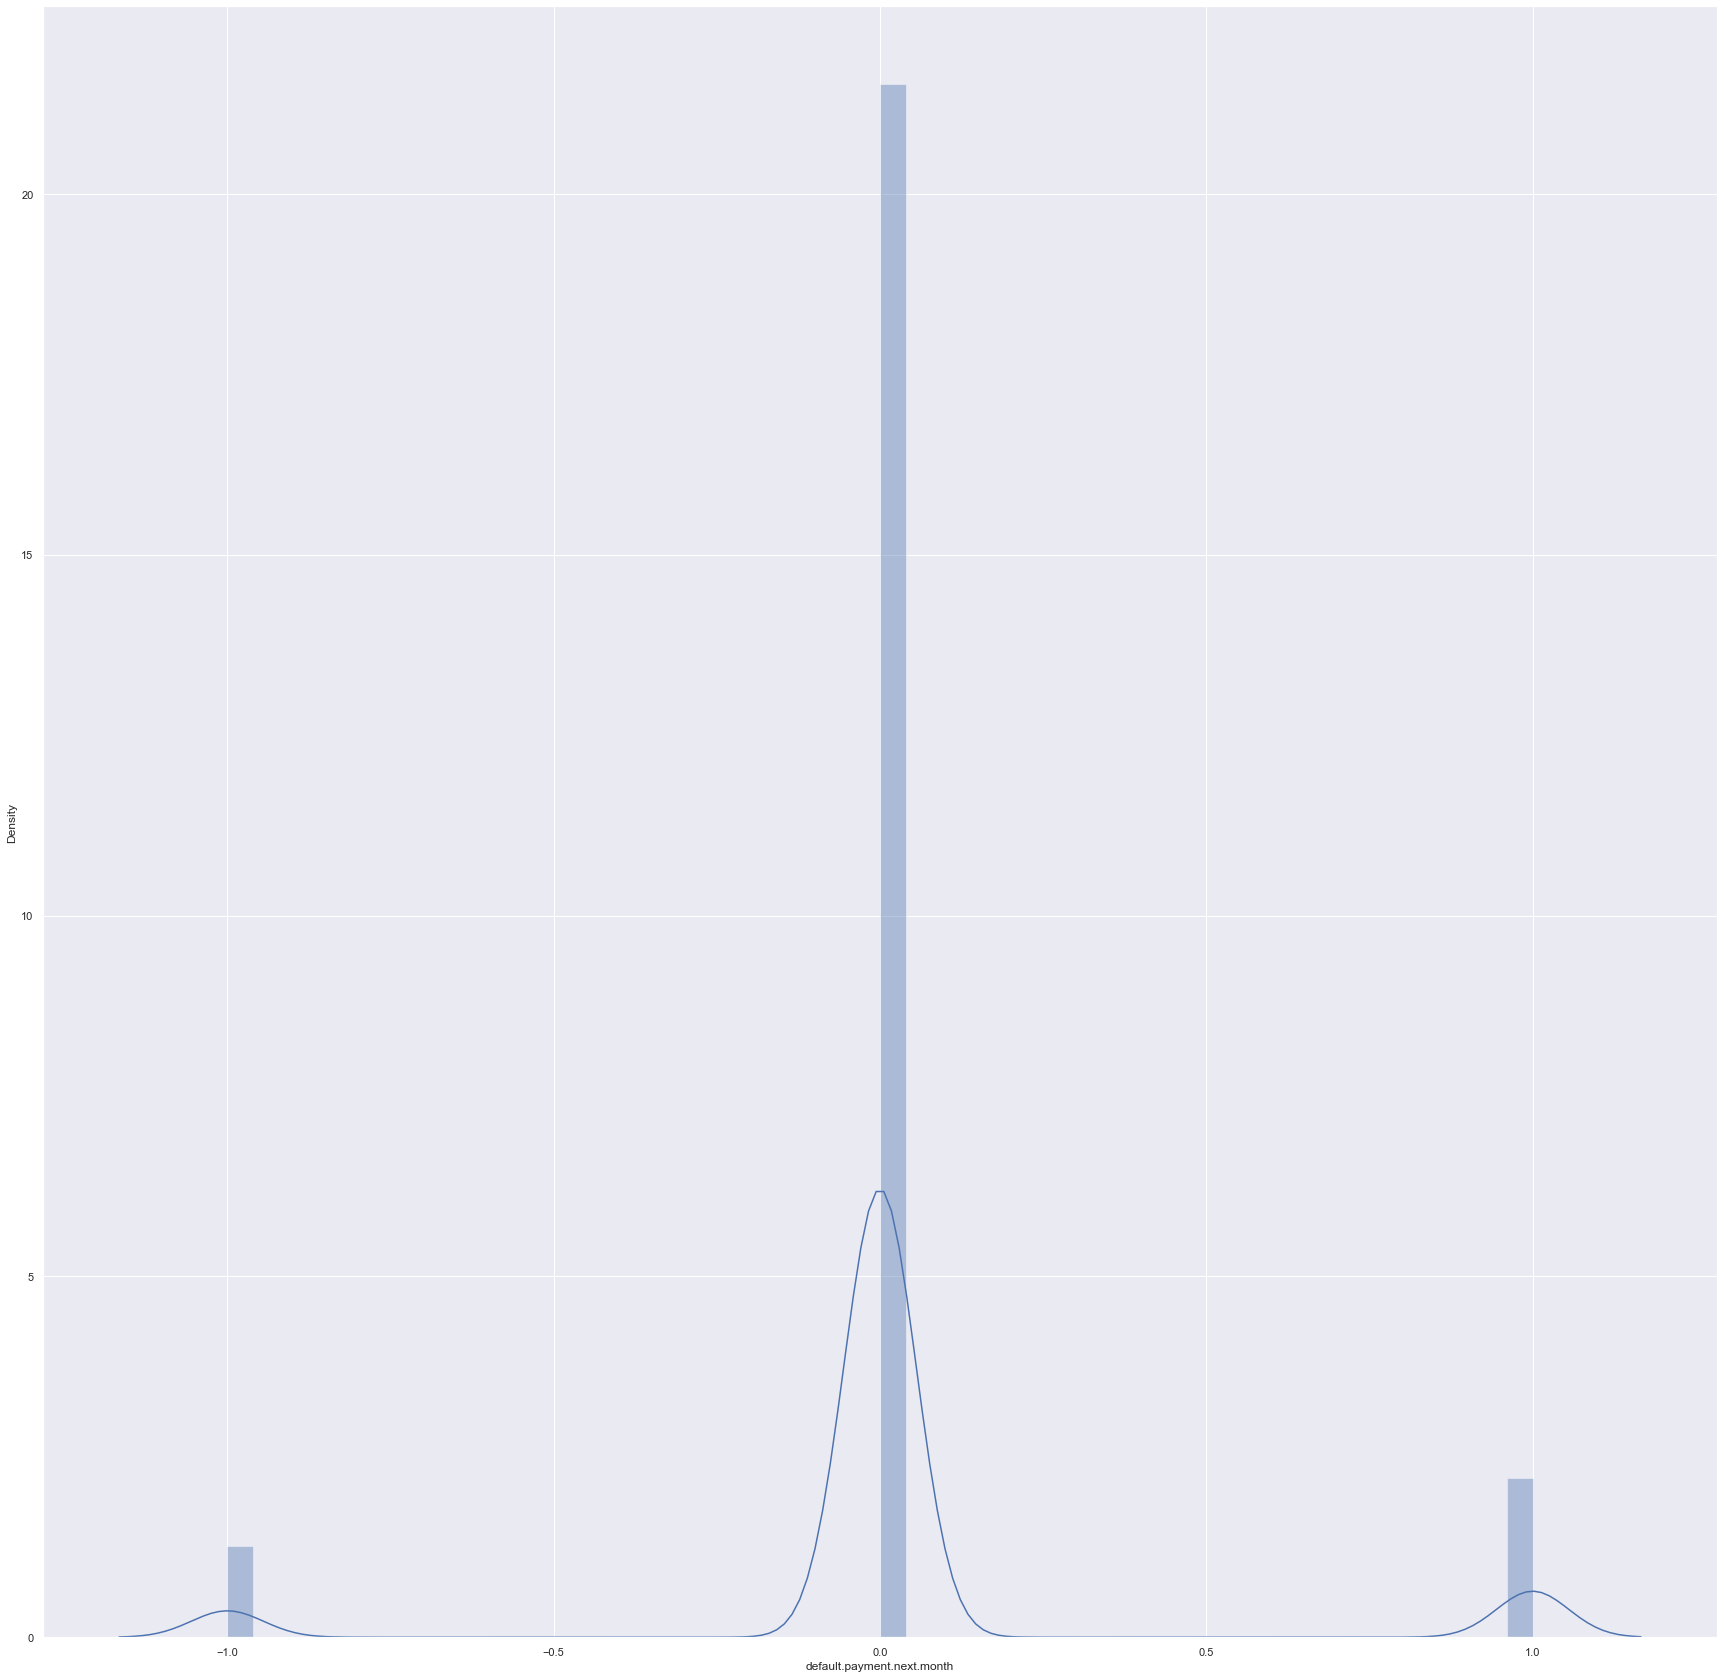

In [48]:
sns.distplot(y_test - y_prediction)


## Calculating the threshold values using ROC curve

### Random Forests

In [49]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
ytrain_pred_rf = rf_model.predict(X_train)
print('rf train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred_rf)))
ytest_pred_rf = rf_model.predict(X_test)
print('rf test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred_rf)))

rf train roc-auc: 0.9995602339307547
rf test roc-auc: 0.8669700410542469


### Logistic Regression

In [50]:
lor = LogisticRegression(random_state=42)
lor.fit(X_train,y_train)
ytrain_pred_lor = rf_model.predict(X_train)
print('lor train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred_lor)))
ytest_pred_lor = rf_model.predict(X_test)
print('lor test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred_lor)))

# lor.score(X_test, y_test)

# print(classification_report(y_test, y_pred_lor))


lor train roc-auc: 0.9995602339307547
lor test roc-auc: 0.8669700410542469


In [51]:
# y_pred_lor = lor.predict_proba(X_test)
# print("X=%s, Predicted=%s" % (X_test[2], y_pred_lor[2]))

### XGBoost Classifier

In [52]:
import xgboost
classifier=xgboost.XGBRegressor()
classifier.fit(X_train,y_train)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [53]:
ytrain_pred_xgb = classifier.predict(X_train) #by default, the predictions made by XGBoost are probabilities &
#predict_proba() method only exists for the scikit-learn interface
print('xgb train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred_xgb[:])))
ytest_pred_xgb = classifier.predict(X_test)
print('xgb test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred_xgb[:])))

xgb train roc-auc: 0.9733500625701059
xgb test roc-auc: 0.9190666280870164


In [54]:
# comparison of all the three models and their prediction values
pred=[]
for model in [rf_model,lor,classifier]:
    pred.append(pd.Series(model.predict(X_test)))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.9066431966634187


In [55]:
pd.concat(pred,axis=1)

,0,1,2
0,1,1,0.925074
1,0,1,0.223644
2,0,0,0.334682
3,0,0,-0.048970
4,1,1,0.989160
...,...,...,...
13641,0,0,0.062528
13642,1,1,1.023448
13643,1,0,0.430153
13644,0,0,0.272583


In [56]:
final_prediction

0        0.975025
1        0.407881
2        0.111561
3       -0.016323
4        0.996387
           ...   
13641    0.020843
13642    1.007816
13643    0.476718
13644    0.090861
13645    0.995716
Length: 13646, dtype: float64

In [57]:
# roc curve for model

# prob = np.where(arr > 0.5, 1, 0)

fpr, tpr, thresholds = roc_curve(y_test,final_prediction, pos_label=1)

thresholds


array([ 2.14127628,  1.14127628,  1.04367801, ..., -0.04104416,
       -0.04172271, -0.10663012])

In [58]:
fpr

array([0.        , 0.        , 0.        , ..., 0.99722222, 0.99722222,
       1.        ])

In [59]:
tpr

array([0.00000000e+00, 1.46929180e-04, 3.39406406e-02, ...,
       9.99853071e-01, 1.00000000e+00, 1.00000000e+00])

In [60]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)

In [62]:
accuracy_ls.head()#hence the treshold value with highest accuracy would be 0.527927

,thresholds,accuracy
999,0.527927,0.859959
1037,0.512257,0.859959
998,0.528240,0.859959
1038,0.512242,0.859886
1039,0.512139,0.859886


In [63]:
#  roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [64]:
# auc scores
auc_score = roc_auc_score(y_test, ytest_pred_xgb)


print(auc_score)

0.9190666280870164


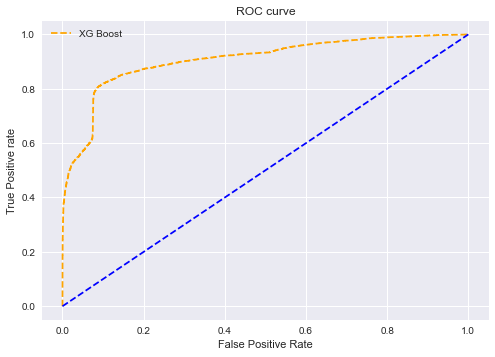

In [65]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='orange', label='XG Boost')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();



In [80]:
# Applying the optimal threshsold value to XGBoost model -  y_pred as this model 
# has given a better accuracy as compare to the Logistic Regression model

arr = np.asarray(y_pred)
y_pred = np.where(arr > 0.527927, 1, 0)

y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [81]:
print(classification_report(y_test, arr.round(), zero_division=0))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00      6840
           1       0.50      1.00      0.67      6806

    accuracy                           0.50     13646
   macro avg       0.75      0.50      0.33     13646
weighted avg       0.75      0.50      0.33     13646



## Final Model

In [82]:
X = df.drop('default.payment.next.month', axis=1)
y = df['default.payment.next.month']

In [84]:
X.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [111]:
import xgboost #importing all the parameters from hyperparameter tunnning which gave us the highest accuracy

# classifier=xgboost.XGBRegressor()
classifier = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7,
              enable_categorical=False, eval_metric='mlogloss', gamma=0.1,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=12,
              min_child_weight=3, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=3)

In [113]:
classifier.fit(X,y)

[21:55:54] INFO: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/tree/updater_prune.cc:101: tree pruning end, 846 extra nodes, 12 pruned nodes, max_depth=12
[21:55:54] INFO: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/tree/updater_prune.cc:101: tree pruning end, 890 extra nodes, 8 pruned nodes, max_depth=12
[21:55:54] INFO: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/tree/updater_prune.cc:101: tree pruning end, 768 extra nodes, 4 pruned nodes, max_depth=12
[21:55:54] INFO: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/tree/updater_prune.cc:101: tree pruning end, 846 extra nodes, 8 pruned nodes, max_depth=12
[21:55:54] INFO: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/tree/updater_prune.cc:101: tree pruning end, 868 extra nodes, 4 pruned nodes, max_depth=12
[21:55:55] INFO: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/tree/updat

[21:55:59] INFO: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/tree/updater_prune.cc:101: tree pruning end, 196 extra nodes, 0 pruned nodes, max_depth=12
[21:55:59] INFO: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/tree/updater_prune.cc:101: tree pruning end, 638 extra nodes, 4 pruned nodes, max_depth=12
[21:55:59] INFO: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=12
[21:55:59] INFO: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/tree/updater_prune.cc:101: tree pruning end, 322 extra nodes, 2 pruned nodes, max_depth=12
[21:55:59] INFO: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/tree/updater_prune.cc:101: tree pruning end, 270 extra nodes, 2 pruned nodes, max_depth=12
[21:55:59] INFO: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/tree/updater

[21:56:07] INFO: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/tree/updater_prune.cc:101: tree pruning end, 308 extra nodes, 2 pruned nodes, max_depth=12
[21:56:08] INFO: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/tree/updater_prune.cc:101: tree pruning end, 238 extra nodes, 6 pruned nodes, max_depth=12
[21:56:08] INFO: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/tree/updater_prune.cc:101: tree pruning end, 110 extra nodes, 0 pruned nodes, max_depth=12
[21:56:08] INFO: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/tree/updater_prune.cc:101: tree pruning end, 230 extra nodes, 2 pruned nodes, max_depth=12
[21:56:08] INFO: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/tree/updater_prune.cc:101: tree pruning end, 206 extra nodes, 2 pruned nodes, max_depth=12
[21:56:08] ======== Monitor (0): Learner ========
[21:56:08] Configure: 0.000573s, 1 calls @ 573us



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7,
              enable_categorical=False, eval_metric='mlogloss', gamma=0.1,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=12,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=3)

In [122]:
test1=[[230000,2,2,1,25,-1,2,0,0,0,-2,2662,7725,2182,3772,3355,3861,60,1670,2300,1900,1265,2700]]
test2= pd.DataFrame(test1,columns= 
['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [123]:
# p = classifier.predict(test2>=0.527927).astype(int) # set threshold as 0.527927 as calcutated above 
p = classifier.predict(test2)
# through roc curve
print("Defualt [0 - No Yes - 1] :\n Result : ",p[0])

Defualt [0 - No Yes - 1] :
 Result :  0


In [124]:
# save the final model
import pickle
filename = 'finalxgb_model.pkl'
pickle.dump(classifier, open(filename, 'wb'))


In [125]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X, y)
print(result)

[22:02:12] ======== Monitor (0): Learner ========
[22:02:12] Configure: 0.000425s, 1 calls @ 425us

[22:02:12] ======== Monitor (0): GBTree ========
[22:02:12] ======== Monitor (0): TreePruner ========
0.9541666666666667


In [126]:
# make a prediction
test1=pd.DataFrame([[230000,2,2,1,25,-1,2,0,0,0,-2,2662,7725,2182,3772,3355,3861,60,1670,2300,1900,1265,2700]])

p = loaded_model.predict(test1)
print("Defualt [0 - No Yes - 1] :\n Result : ",p[0])

Defualt [0 - No Yes - 1] :
 Result :  0
